In [2]:
from IPython.display import Image

1. 활성화 함수
- 활성화 함수
- 퍼셉트론
    - 신경세포의 구조
    - 퍼셉트론의 구조
2. 선형과 비선형
- 선형
- 비선형
- 비선형 함수를 쓰는 이유
    - 그렇다면..(비선형 함수를 쓴다면?)
3. 활성화 함수의 종류
- 이진 계단 함수
    - 이진 계단 함수의 한계
- 선형 활성화 함수
    - 선형 활성화 함수의 한계
- 비선형 활성화 함수
    - 시그모이드/로지스틱
    - 하이퍼볼릭 탄젠트
    - ReLU
         -ReLU의 단점을 극복하기 위한 시도들


사용할 모듈 미리 import하기!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from itertools import product
import tensorflow as tf

tf.random.set_seed(7879)

print('Ready to activate?⤴')

Ready to activate?⤴


오늘은 수학 분야에서도 딥러닝과 아주아주 밀접하고 직접적인 주제를 다루어보겠습니다.

바로 softmax나 ReLU 등 이미 익숙히 들어보셨을 활성화 함수(activation function) 입니다. 

🙂 활성화 함수란 무엇일까요? "어떤 것이 활성화(activated)되었다" 라는 것을 들으면 어떤 것이 떠오르시나요?

넌 나의 함정 카드를 발동(활성화) 시켰다! 라는, 게임에서 종종 나오는 아래 사진과 같은 표현이 있습니다 😉

![title](https://d3s0tskafalll9.cloudfront.net/media/images/0f-34.activate_trap.max-800x600.png)

특정 행동을 함 → 특정 조건을 만족 → 함정 카드 발동 이라는 일련의 사건을 뜻하는데요. 이처럼 활성화(activated) or 비활성화(deactivated)라는 것은 '어떤 조건을 만족 or 불만족했다'라는 것과 긴밀한 연관이 있습니다.

우리가 지금까지 써왔던 신경망 속의 퍼셉트론(perceptron) 혹은 노드(node)도 '특정 조건'이 만족하면 '활성화' 되도록 디자인되어 있습니다.

노드에 입력으로 들어오는 값이 어떤 '임계치'를 넘어가면 "활성화(activated)"되고, 넘어가지 않으면 "비활성화(deactivated)"되게끔 코딩이 되어있는 것이죠. 익숙하게 써오셨던 ReLU 함수는 이러한 관점에서 어떻게 작용하고 있을까요?

ReLU는 입력값이 음수라면, 즉 0 미만이라는 조건을 만족한다면 0을 출력하고, 입력값이 0이상이면 입력값 그대로를 출력하도록 디자인되어 있습니다. 이를 "활성화 or 비활성화"로 표현하려면 우선 활성화되는 기준을 정해야 합니다. 만일 출력값이 0보다 큰 경우를 활성화 되었다고 정의한다면, ReLU함수란, "0 미만인 경우는 비활성화가 되고 0 이상인 경우는 활성화되는 함수"라고 말할 수 있습니다.



활성화 함수의 기본적 정의는 위와 같지만, 실제로 딥러닝에서 활성화 함수를 쓰는 결정적 이유는 따로 있습니다.

바로 딥러닝 모델의 표현력을 향상시켜주기 위해서 인데요, 전문적인 용어로는 모델의 representation capacity 또는 expressivity를 향상시킨다라고도 말합니다.

딥러닝 모델의 parameter(w,~bw, b)들은 입력값 xx와 선형 관계입니다. 

왜냐하면, xw+bxw+b의 표현되는, 즉 곱하고 더하는 연산만 하면서 그다음 layer로 전달하기 때문이죠.

그리고 아무리 많은 layer들을 겹쳐도 역시 그 결과는 선형 관계입니다. 

따라서 사인 곡선처럼 직선으로는 근사 시킬 수 없는 (혹은 고양이나 강아지 사진처럼 무수히 많고 복잡한 특징들을 가진) 비선형 데이터를 표현하려면 딥러닝 모델도 비선형성을 지니고 있어야 합니다. 

이때 쓰인 것이 바로 활성화 함수이고, 이 활성화 함수를 layer 사이 사이에 넣어줌으로써 모델이 비선형 데이터도 표현할 수 있게 되었습니다. 

이 부분은 중요한 부분이니 세부 노드에서 더 상세히 다루어보겠습니다. 😉

마지막으로 활성화 함수에는 하이퍼볼릭 탄젠트(tanh), 시그모이드(sigmoid), Softmax, ReLU 등등 많은 함수들이 있는데요. 활성화 함수들이 가지는 특징들은 어떤 것이 있는지도 알아보겠습니다.



## 퍼셉트론

#### 퍼셉트론

활성화 함수가 어디서 나온 건지 알아보기 위해 먼저 퍼셉트론에 대해 짧게 공부하고 가겠습니다.

우리가 알고 있는 딥러닝 모델은 보통 여러 개의 층으로 이루어져 있습니다. 

그중에 하나의 층을 가져와 다시 쪼갠다면 보통 '노드'라고 불리는 것으로 쪼개지게 되는데, 이것이 바로 퍼셉트론(Perceptron)입니다. 

반대로 퍼셉트론을 쌓으면 단층 퍼셉트론이 되고, 이 단층 퍼셉트론을 쌓으면 다층 퍼셉트론이 됩니다.

즉, 우리가 알고 있는 딥러닝 모델은 사실 퍼셉트론들이 다양한 구조로 쌓인 것이죠.

그렇다면 퍼셉트론은 어떻게 나온 것일까요?

우리의 목표는 컴퓨터를 학습시키는 것입니다. 

그런데 어떻게 컴퓨터를 학습시킬 수 있을까요? 

과학자들은 방법을 생각하다가 이미 잘 짜인 머신이라고도 할 수 있는 동물의 학습 방법을 모방하기로 합니다. 

이를 위해서 학습시킬 머신 자체를 동물의 신경세포와 유사하게 설계해 나오게 된 것이 바로 최초의 퍼셉트론입니다.



# 신경세포의 구조

그럼 퍼셉트론의 구조를 보기 전에 간단히 신경세포(Nueron)에 대해 잠시 살펴보겠습니다.

신경세포는 크게 세포체(Soma), 가지돌기(Dendrite), 축삭돌기(Axon), 시냅스(Synapse)로 구성되어 있습니다.

(물론 해부학적으로 더 세분화해서 나눌 수 있겠지만 여기서는 퍼셉트론과 대응되는 구성요소만 다루겠습니다.)

![title](https://d3s0tskafalll9.cloudfront.net/media/images/F-34-neuron2.max-800x600.png)

- 가지돌기

    세포로 전달되는 신호를 받아들이는 부분입니다.

- 축삭돌기

    세포에서 다른 세포로 신호를 전달하는 부분입니다.

- 시냅스

    가지돌기와 축삭돌기 사이에 있는 부분으로 신호 전달의 세기를 담당하며 시냅스의 발달 정도에 따라 같은 신호도 강하게 전달되거나 약하게 전달됩니다. 시냅스는 사용 빈도에 따라 커지거나 작아지며 심지어 시냅스 자체가 사라지기도 합니다.

- 세포체

    세포체는 각 가지돌기로부터 들어온 신호들로부터 자신의 출력 신호를 만들고 이를 다음 세포에 전송합니다. 이때의 출력 신호는 단순히 입력신호들의 합이 아닌 비선형 방식으로 결정됩니다. 즉, 합이 일정 수준 이하이면 비활성 상태가 되어 신호를 무시하고, 일정 수준을 넘게 되면 활성 상태가 되어 신호를 다음 세포로 전송합니다.

## 퍼셉트론의 구조

![title](https://d3s0tskafalll9.cloudfront.net/media/original_images/F-34-perceptron.png)

앞에서 소개한 신경세포의 구조와 퍼셉트론의 구조를 대응 시켜 소개하겠습니다.

퍼셉트론에 주어지는 입력은 신경세포에서 가지돌기로 받아들이는 신호에 해당합니다.

각 입력 항에 곱해지는 가중치는 신경 세포들의 연결 부위에 형성된 시냅스의 발달 정도에 해당합니다.

x_i w_ix iw i

 값들은 각 가지돌기에서 시냅스를 거쳐서 오는 신호들에 해당되며 세포체에서 이 신호들은 합쳐(\SigmaΣ)집니다. 
 
 실제 신경세포에는 없지만 퍼셉트론에선 추가로 편향이라고 불리는 b(bias)라는 신호 또한 합산에 포함됩니다.
 
 그리고 이 합쳐진 신호는 세포체에서 신호를 처리하는 방식과 비슷하게 적절한 활성화 함수(activation function) f 를 거쳐 출력이 결정됩니다. 
 
![title](https://d3s0tskafalll9.cloudfront.net/media/original_images/F-34-compare4.png)



## 활성화 함수

앞서 확인할 수 있듯이 활성화 함수는 신경 세포로 치면 세포체에서 일어나는 일을 맡고 있습니다.

따라서 하는 일도 비슷합니다. 

들어온 신호가 특정 임계점을 넘으면 출력을 하고, 넘지 못하면 무시를 합니다.

활성화 함수는 신호를 '전달' 해주기 때문에 Transfer function으로도 알려져 있습니다.

활성화 함수는 그 표현에 따라

- 선형 활성화 함수(Linear activation function)

- 비선형 활성화 함수(Non-linear activation function)

로 나눌 수 있습니다.

딥러닝에서는 일반적으로 비선형 활성화 함수를 사용한다고 합니다.

그럼 선형 활성화 함수는 왜 딥러닝에서 사용되지 않는 걸까요? 이를 알아보기 위해 먼저 선형(Linear)에 대해 알아보겠습니다.



## 선형과 비선형

### 선형(Linear)

[동영상](https://youtu.be/kYB8IZa5AuE) 먼저 시청해주시면 감사하겠습니다.


## 비선형(Non-linear)

선형이 아닌 함수를 비선형(Non-linear) 함수라고 합니다.



#### 비선형 함수를 쓰는 이유

그렇다면 왜 딥러닝에서는 비선형 활성화 함수를 주로 사용할까요?

앞서 Introduction에서 잠시 언급했듯, 한 문장으로 요약하자면, "딥러닝 모델의 표현력을 향상시키기 위해서" 입니다.

그럼 선형 활성화 함수를 사용하면 왜 표현력이 떨어지게 되는 걸까요?
레이어를 충분히 쌓는다면 선형 활성화 함수를 사용한 모델의 표현력을 향상시킬 수 있지 않을까요?
간단한 예시를 통해 알아가보도록 하겠습니다.

![title](https://d3s0tskafalll9.cloudfront.net/media/original_images/F-34-3node_model.png)

위 그림과 같이 퍼셉트론 3개로 구성된 모델이 있다고 가정하겠습니다.

입력값 xx가 모델을 거치면 출력값 yy가 됩니다. (여기서 입력값 xx와 출력값 yy는 스칼라값이고 ff는 활성화 함수입니다.)


- 선형 활성화 함수를 사용한다면, 노드의 개수를 아무리 많이 붙여도 결국 하나의 노드를 사용하는 것과 차이가 없습니다.



활성화 함수는 크게 3가지 종류의 함수로 나눌 수 있습니다.

- 이진 계단 함수(Binary step function)

- 선형 활성화 함수(Linear activation function)

- 비선형 활성화 함수(Non-linear activation function)


이진 계단 함수

이진 계단 함수(Binary step function) 라는 이름이 붙은 이유는 간단합니다. 

이 함수로 들어온 입력이 특정 임계점을 넘으면 11(혹은 True)를 출력하고 그렇지 않을 때는 00을 출력하기 때문입니다. (그래프를 보면 더 명확히 알 수 있습니다.) 이러한 특성 때문에 이 활성화 함수는 간단한 이진 분류 문제에서 꽤 유용하게 쓰입니다. 아래의 식은 임계점이 00일 때의 이진 계단 함수식입니다.

In [3]:
def binary_step(x, threshold=0): 
# threshold가 있는 함수를 쓰면 꼭 defualt 값을 설정해주세요
    return 0 if x<threshold else 1

In [4]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def plot_and_visulize(image_url, function, derivative=False):
    X = [-10 + x/100 for x in range(2000)]
    y = [function(y) for y in X]
    
    plt.figure(figsize=(12,12))
    
    # 함수 그래프
    plt.subplot(3,2,1)
    plt.title('function')
    plt.plot(X,y)
    
    # 함수의 미분 그래프
    plt.subplot(3,2,2)
    plt.title('derivative')
    if derivative:
        dev_y = [derivative(y) for y in X]
        plt.plot(X,dev_y)
    
    # 무작위 샘플들 분포
    samples = np.random.rand(1000)
    samples -= np.mean(samples)
    plt.subplot(3,2,3)
    plt.title('samples')
    plt.hist(samples,100)
    
    # 활성화 함수를 통과한 샘플들 분포
    act_values = [function(y) for y in samples]
    plt.subplot(3,2,4)
    plt.title('activation values')
    plt.hist(act_values,100)
    
    # 원본 이미지
    image = np.array(Image.open(image_url), dtype=np.float64)[:,:,0]/255. # 구분을 위해 gray-scale해서 확인
    image -= np.median(image)
    plt.subplot(3,2,5)
    plt.title('origin image')
    plt.imshow(image, cmap='gray')
    
    # 활성화 함수를 통과한 이미지
    activation_image = np.zeros(image.shape)
    h, w = image.shape
    for i in range(w):
        for j in range(h):
            activation_image[j][i] += function(image[j][i])
    plt.subplot(3,2,6)
    plt.title('activation results')
    plt.imshow(activation_image, cmap='gray')
    
    return plt

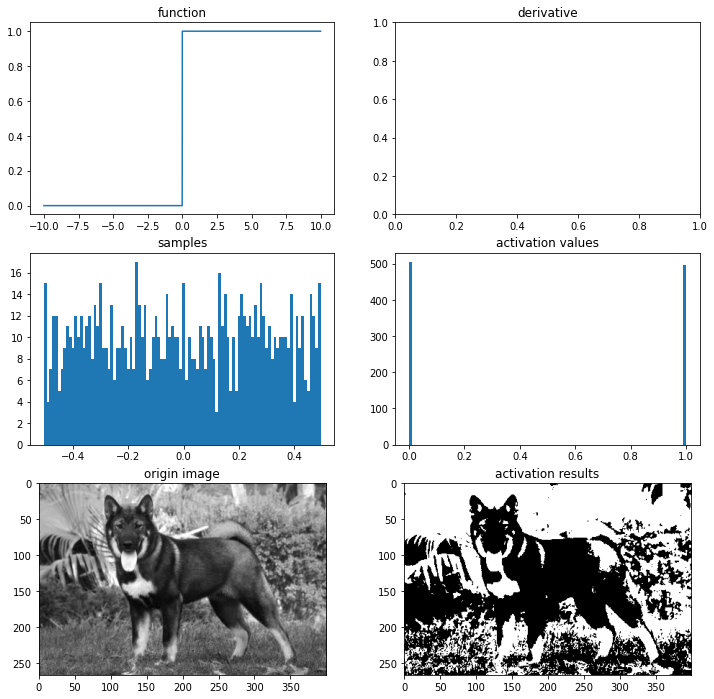

In [5]:
import os
img_path = os.getenv('HOME')+'/aiffel/activation/jindo_dog.jpg'
ax = plot_and_visulize(img_path, binary_step)
ax.show()

이진 계단 함수의 치역(range)은 00,11 (00과 11만 나온다는 뜻)이 됩니다.

이진 계단 함수는 단층 퍼셉트론(single layer perceptrons)라는 초기의 신경망에서 자주 사용되었습니다.

![title](https://d3s0tskafalll9.cloudfront.net/media/original_images/F-34-slp.png)



In [6]:
# 퍼셉트론
class Perceptron(object):
    def __init__(self, input_size, activation_ftn, threshold=0, learning_rate=0.01):
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn(1)
        self.activation_ftn = np.vectorize(activation_ftn)
        self.learning_rate = learning_rate
        self.threshold = threshold

    def train(self, training_inputs, labels, epochs=100, verbose=1):
        '''
        verbose : 0-매 에포크 결과 출력, 
                  1-마지막 결과만 출력 
        '''
        for epoch in range(epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.__call__(inputs)
                self.weights += self.learning_rate * (label - prediction) * inputs
                self.bias += self.learning_rate * (label - prediction)
            if verbose == 1:
                pred = self.__call__(training_inputs)
                accuracy = np.sum(pred==labels)/len(pred)
                print(f'{epoch}th epoch, accuracy : {accuracy}')
        if verbose == 0:
            pred = self.__call__(training_inputs)
            accuracy = np.sum(pred==labels)/len(pred)
            print(f'{epoch}th epoch, accuracy : {accuracy}')
    
    def get_weights(self):
        return self.weights, self.bias
                
    def __call__(self, inputs):
        summation = np.dot(inputs, self.weights) + self.bias
        return self.activation_ftn(summation, self.threshold)

이러한 신경망은 선형적으로 구분 가능한(linearly separable) 문제(예를 들면, AND gate 또는 OR gate)를 구현할 수 있습니다. 다시 말해 하나의 선으로 구분할 수 있는 문제를 풀 수 있습니다.

In [7]:
def scatter_plot(plt, X, y, threshold = 0, three_d=False):
    ax = plt
    if not three_d:
        area1 = np.ma.masked_where(y <= threshold, y)
        area2 = np.ma.masked_where(y > threshold, y+1)
        ax.scatter(X[:,0], X[:,1], s = area1*10, label='True')
        ax.scatter(X[:,0], X[:,1], s = area2*10, label='False')
        ax.legend()
    else:
        area1 = np.ma.masked_where(y <= threshold, y)
        area2 = np.ma.masked_where(y > threshold, y+1)
        ax.scatter(X[:,0], X[:,1], y-threshold, s = area1, label='True')
        ax.scatter(X[:,0], X[:,1], y-threshold, s = area2, label='False')
        ax.scatter(X[:,0], X[:,1], 0, s = 0.05, label='zero', c='gray')
        ax.legend()
    return ax

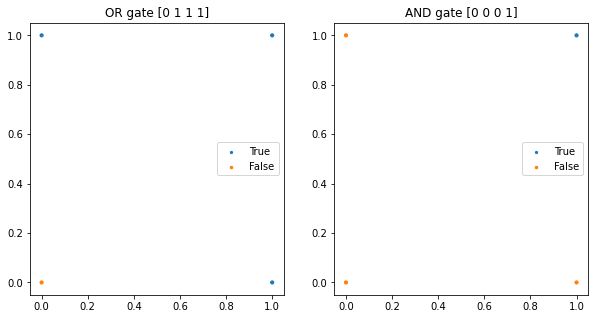

In [8]:
# AND gate, OR gate
X = np.array([[0,0], [1,0], [0,1], [1,1]])

plt.figure(figsize=(10,5))
# OR gate
or_y = np.array([x1 | x2 for x1,x2 in X])
ax1 = plt.subplot(1,2,1)
ax1.set_title('OR gate ' + str(or_y))
ax1 = scatter_plot(ax1, X, or_y)

# AND gate
and_y = np.array([x1 & x2 for x1,x2 in X])
ax2 = plt.subplot(1,2,2)
ax2.set_title('AND gate ' + str(and_y))
ax2 = scatter_plot(ax2, X, and_y)

plt.show()

이진 계단 함수의 임계점이 0이라고 하면 위의 gate들은 다음과 같이 단층 퍼셉트론으로 구현할 수 있습니다.

![title](https://d3s0tskafalll9.cloudfront.net/media/original_images/F-34-slp_solve_problems3.png)


In [9]:
# OR gate
or_p = Perceptron(input_size=2, activation_ftn=binary_step)
or_p.train(X, or_y, epochs=1000, verbose=0)
print(or_p.get_weights()) # 가중치와 편향값은 훈련마다 달라질 수 있습니다.

# AND gate
and_p = Perceptron(input_size=2, activation_ftn=binary_step)
and_p.train(X, and_y, epochs=1000, verbose=0)
print(and_p.get_weights()) # 가중치와 편향값은 훈련마다 달라질 수 있습니다.

999th epoch, accuracy : 1.0
(array([0.51514726, 0.2501187 ]), array([-0.00271668]))
999th epoch, accuracy : 1.0
(array([0.08979514, 0.01912182]), array([-0.10249958]))


OR gate와 AND gate 를 구현한 단층 퍼셉트론 모델의 accuracy가 1.0을 기록하고 있습니다. 

이 정도면 단층 퍼셉트론으로 OR gate와 AND gate 를 충분히 구현해 낼 수 있음을 확인할 수 있겠습니다.

그럼 우리의 단층 퍼셉트론 모델의 추론 결과를 그래프로 그려 보겠습니다. 

위에서 그려보았던 그래프가 4개의 점으로 표시된 것에 비해, 아래 그려질 그래프는 x, y축를 100등분한 결과를 모델에 대입하여 True와 False의 경계선이 선형적으로 드러나도록 그려질 것입니다. 

위에서 언급한 것처럼 퍼셉트론이 하나의 선으로 구분할 수 있는 문제를 풀 수 있다 는 것을 시각적으로 확인하기 위해서입니다.



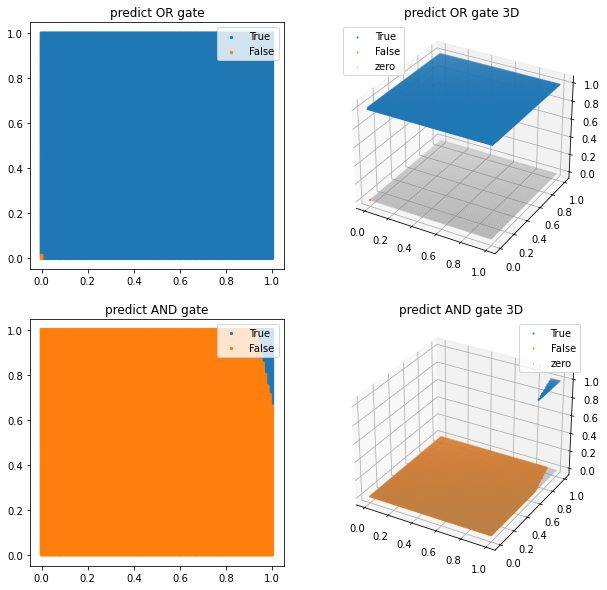

In [10]:
from itertools import product

# 그래프로 그려보기
test_X = np.array([[x/100,y/100] for (x,y) in product(range(101),range(101))])
pred_or_y = or_p(test_X)
pred_and_y = and_p(test_X)

plt.figure(figsize=(10,10))
ax1 = plt.subplot(2,2,1)
ax1.set_title('predict OR gate')
ax1 = scatter_plot(ax1, test_X, pred_or_y)

ax2 = plt.subplot(2,2,2, projection='3d')
ax2.set_title('predict OR gate 3D')
ax2 = scatter_plot(ax2, test_X, pred_or_y, three_d=True)

ax3 = plt.subplot(2,2,3)
ax3.set_title('predict AND gate')
ax3 = scatter_plot(ax3, test_X, pred_and_y)

ax4 = plt.subplot(2,2,4, projection='3d')
ax4.set_title('predict AND gate 3D')
ax4 = scatter_plot(ax4, test_X, pred_and_y, three_d=True)

plt.show()

어떻습니까? 당초 예상했던 것과 그래프의 모양이 다소 다르게 나오나요? 

이미 눈치채셨겠지만, 이 그래프의 모양은 단층 퍼셉트론을 훈련(train)할 때마다 다르게 그려질 것입니다. 

OR gate와 AND gate의 accuracy를 1.0으로 만드는 퍼셉트론의 최적 가중치 값은 하나로 정해져 있지 않으므로, 따라서 이 가중치에 의해 결정되는 그래프의 모양도 계속 달라집니다. 

그러나 중요한 것은 퍼셉트론의 가중치가 결정짓는 경계선을 기준으로 [[0,0], [1,0], [0,1], [1,1]] 이상 4개의 점에서의 OR gate, AND gate의 진릿값이 정확한가 하는 것입니다.



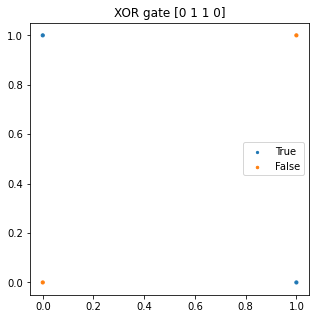

In [11]:
# XOR gate
threshold = 0
X = np.array([[0,0], [1,0], [0,1], [1,1]])

plt.figure(figsize=(5,5))
xor_y = np.array([x1 ^ x2 for x1,x2 in X])
plt.title('XOR gate '+ str(xor_y))
plt = scatter_plot(plt, X, xor_y)
plt.show()

999th epoch, accuracy : 0.5
(array([ 0.00283744, -0.02577697]), array([0.00483853]))


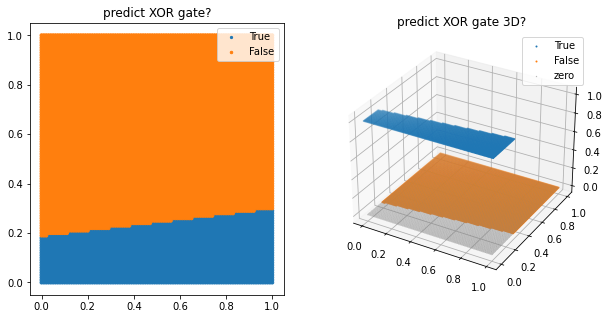

In [12]:
# XOR gate가 풀릴까?
xor_p = Perceptron(input_size=2, activation_ftn=binary_step, threshold=threshold)
xor_p.train(X, xor_y, epochs=1000, verbose=0)
print(xor_p.get_weights())

# 그래프로 그려보기
test_X = np.array([[x/100,y/100] for (x,y) in product(range(101),range(101))])
pred_xor_y = xor_p(test_X)

plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,2,1)
ax1.set_title('predict XOR gate?')
ax1 = scatter_plot(ax1, test_X, pred_xor_y)

ax2 = plt.subplot(1,2,2, projection='3d')
ax2.set_title('predict XOR gate 3D?')
ax2 = scatter_plot(ax2, test_X, pred_xor_y, three_d=True)

plt.show()

어떤가요? 이번에 나온 accuracy는 무려.... 0.25밖에 안됩니다. 왜 그럴까요?

단층 퍼셉트론은 이 XOR gate를 구현할 수 없습니다. 왜냐하면 XOR gate의 진릿값 그래프를 하나의 선으로 구분을 할 수 없기 때문입니다. 

하지만 이를 해결할 수 있는 방법이 있습니다. 바로 여러 층을 쌓는 것입니다. 이렇게 여러 층을 쌓은 모델을 다층 퍼셉트론(multi-layer perceptron, MLP) 이라고 합니다.

(여기서 말하는 single layer, multi-layer라고 하는 것은 퍼셉트론을 하나를 쓰냐, 여러 개를 쓰냐를 뜻하는 것으로 현대 인공신경망에서 쓰이고 있는 layer와는 의미가 다릅니다.

현대 인공신경망에서 쓰이는 단어대로 표현을 하자면 single layer는 노드의 개수가 1개인 layer 하나를 뜻하고, multi-layer는 노드의 개수가 2개 이상인 layer하나를 뜻합니다.)

여러 층을 쌓는 것이 무슨 의미가 있는가 생각하실 수 있습니다.

이것은 나중에 비선형 활성화 함수의 종류를 설명할 때 함께 다루도록 하겠습니다. 일단은 어떤 식으로 풀 수 있는지 그림을 통해 알아보겠습니다.
![title](https://d3s0tskafalll9.cloudfront.net/media/original_images/F-34-mlp_solve_xor.png)

### 이진 계단 함수의 한계 2

이처럼 층만 쌓으면 이진 계단 함수를 사용한 모델은 비선형적 데이터도 예측할 수 있습니다. 

하지만 이진 계단 함수는 몇 가지 큰 단점이 있습니다.

바로 역전파 알고리즘(backpropagation algorithm)을 사용하지 못하는 것입니다.

이진 계단 함수는 00에서는 미분이 안 될 뿐더러 00인 부분을 제외하고 미분을 한다고 해도 미분값이 전부 00이 나옵니다. 때문에 역전파에서 가중치들이 업데이트되지 않습니다.

(이진 계단 함수를 사용한 퍼셉트론은 어떻게 가중치가 업데이트되는지 궁금하신 분들은 아래의 위키피디아 페이지를 참고하세요.)

- 참고 자료 : [위키피디아 - Perceptron](https://en.wikipedia.org/wiki/Perceptron)

현실의 대부분 문제들에서 다층 인공신경망을 사용하고 있고 이런 인공신경망을 훈련시킬때 역전파 알고리즘을 사용하고 있습니다.

이진 계단 함수를 사용한다면 역전파 알고리즘을 사용하지 못하기 때문에 상대적으로 비효율적인 업데이트 방법을 사용해야 합니다. 

즉, 현실의 복잡한 문제는 사실상 해결하기 어렵다는 것이죠.

또한 다중 출력은 할 수 없다는 단점이 있습니다. 

이진 계단 함수는 출력을 11 또는 00으로 밖에 주지 못하기 때문에 다양한 클래스를 구분해야 하는 문제는 해결할 수 없습니다.

이진 계단 함수는 정말 초기의 퍼셉트론에서 쓰이던 것으로 이런 것이 있었구나 정도만 알고 넘어가면 좋을 것 같습니다.



### 선형 활성화 함수

선형 활성화 함수(linear activation function)은 말 그대로 '선형'인 활성화 함수입니다.

선형 활성화 함수를 사용한 모델은 이진 계단 함수를 사용한 모델과 다르게 다중 출력이 가능합니다.

때문에 이진 분류는 물론이고 간단한 다중 분류 문제까지도 해결할 수 있습니다.

또한 미분이 가능해서 역전파 알고리즘 또한 사용할 수 있습니다.

대표적인 선형 함수로는 f(x) = xf(x)=x가 있습니다. 즉, 신호를 받은 그대로 출력하는 것이죠.

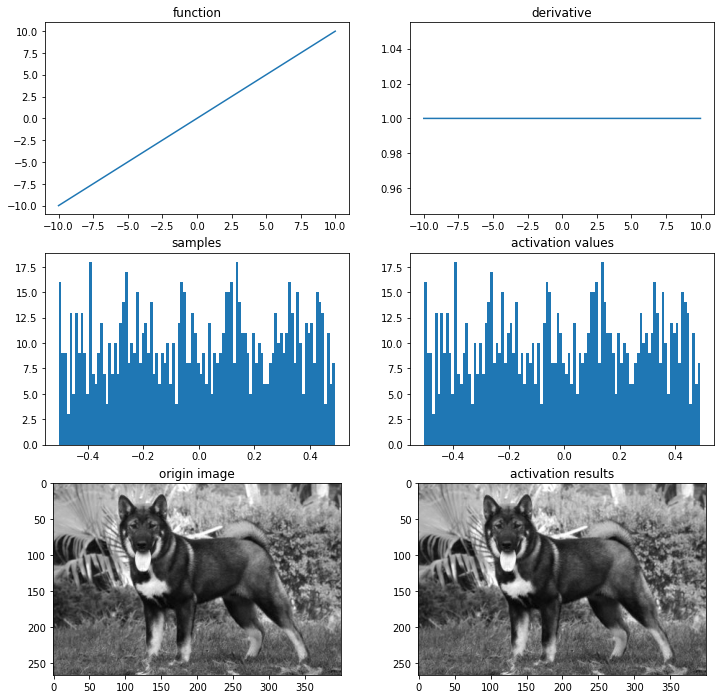

In [13]:
import os
img_path = os.getenv('HOME')+'/aiffel/activation/jindo_dog.jpg'

# 선형 함수
def linear(x):
    return x

def dev_linear(x):
    return 1

# 시각화
ax = plot_and_visulize(img_path, linear, dev_linear)
ax.show()

선형 활성화 함수의 치역은 실수 전체입니다.

선형 활성화 함수를 사용한 모델은 그 이름에 걸맞게 선형적으로 구분 가능한 문제를 해결할 수 있습니다. 

조금 전에 보았던 AND gate와 OR gate를 가져와 보겠습니다.

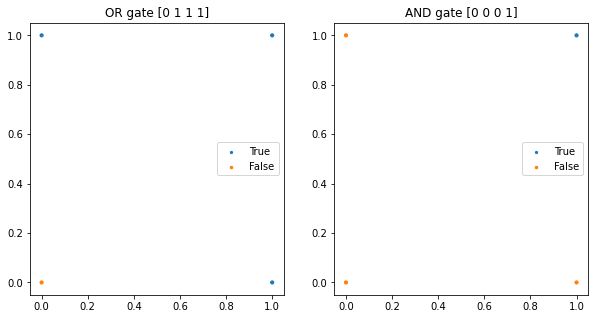

In [14]:
# AND gate, OR gate
threshold = 0
X = np.array([[0,0], [1,0], [0,1], [1,1]])

plt.figure(figsize=(10,5))
# OR gate
or_y = np.array([x1 | x2 for x1,x2 in X])
ax1 = plt.subplot(1,2,1)
ax1.set_title('OR gate ' + str(or_y))
ax1 = scatter_plot(ax1, X, or_y)

# AND gate
and_y = np.array([x1 & x2 for x1,x2 in X])
ax2 = plt.subplot(1,2,2)
ax2.set_title('AND gate ' + str(and_y))
ax2 = scatter_plot(ax2, X, and_y)

plt.show()

선형 활성화 함수를 사용한 단층 퍼셉트론을 이용해 해당 gate를 다음과 같이 구현할 수 있습니다.

![title](https://d3s0tskafalll9.cloudfront.net/media/original_images/F-34-linear_slp_solve_problems.png)



In [15]:
import tensorflow as tf

# OR gate model
or_linear_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,), dtype='float64'),
    tf.keras.layers.Dense(1, activation='linear')
])
or_linear_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
or_linear_model.summary()

# AND gate model
and_linear_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,), dtype='float64'),
    tf.keras.layers.Dense(1, activation='linear')
])
and_linear_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
and_linear_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [17]:
or_linear_model.fit(X, or_y, epochs=1000, verbose=1)
and_linear_model.fit(X, and_y, epochs=1000, verbose=1)
print('done')

Epoch 1/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0625 - accuracy: 1.0000
Epoch 2/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0625 - accuracy: 1.0000
Epoch 3/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0625 - accuracy: 1.0000
Epoch 4/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0625 - accuracy: 1.0000
Epoch 5/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0625 - accuracy: 1.0000
Epoch 6/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0625 - accuracy: 1.0000
Epoch 7/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0625 - accuracy: 1.0000
Epoch 8/1000
1/1 [==============================] - 0s 4ms/step - loss: 0.0625 - accuracy: 1.0000
Epoch 9/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0625 - accuracy: 1.0000
Epoch 10/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0625 - accuracy: 1.0000
Epoch 11/1000
1/1 [

/opt/conda/lib/python3.7/site-packages/matplotlib/collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


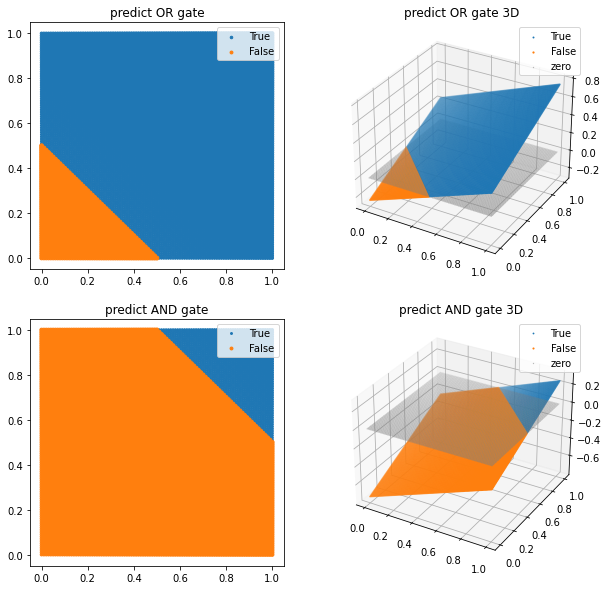

In [18]:
# 그래프로 그려보기
test_X = np.array([[x/100,y/100] for (x,y) in product(range(101),range(101))])
pred_or_y = or_linear_model(test_X)
pred_and_y = and_linear_model(test_X)

plt.figure(figsize=(10,10))
ax1 = plt.subplot(2,2,1)
ax1.set_title('predict OR gate')
ax1 = scatter_plot(ax1, test_X, pred_or_y, threshold=0.5)

ax2 = plt.subplot(2,2,2, projection='3d')
ax2.set_title('predict OR gate 3D')
ax2 = scatter_plot(ax2, test_X, pred_or_y, threshold=0.5, three_d=True)

ax3 = plt.subplot(2,2,3)
ax3.set_title('predict AND gate')
ax3 = scatter_plot(ax3, test_X, pred_and_y, threshold=0.5)

ax4 = plt.subplot(2,2,4, projection='3d')
ax4.set_title('predict AND gate 3D')
ax4 = scatter_plot(ax4, test_X, pred_and_y, threshold=0.5, three_d=True)

plt.show()

물론 선형 활성화를 사용한 단층 퍼셉트론이 정확한 값을 예측하는 것은 아닙니다. 

위의 예시를 보면 첫 번째 AND gate를 구현하기 위한 모델에 [[0,0],[0,1],[1,0],[1,1]]을 넣으면 나오는 출력값은 [[-0.25],[0.25],[0.25],[0.75]]이며, 두 번째 OR gate를 구현하기 위한 모델에 [[0,0],[0,1],[1,0],[1,1]]를 넣으면 출력값은 [[0.25],[0.75],[0.75],[1.25]]가 됩니다.

따라서 그림에도 결과가 유사하다는 표현을 해놓았습니다. 

하지만, 만약 0.50.5를 기준으로 기준보다 높으면 11이고 낮으면 0을 출력하게 한다면, 이 모델들은 AND gate와 OR gate를 완벽히 구현한다고 말할 수 있습니다.

그럼 이 모델로 XOR gate를 구현할 수 있을까요? 정답은 '불가능하다' 입니다.



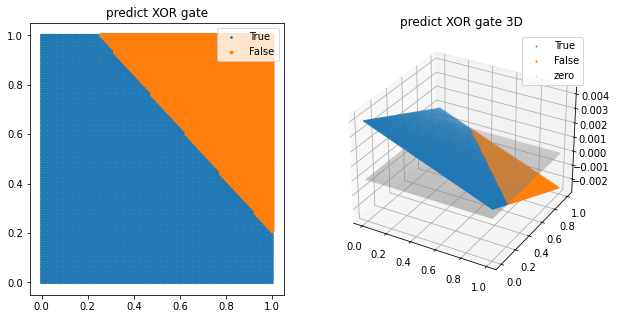

In [19]:
# XOR gate
xor_linear_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,), dtype='float64'),
    tf.keras.layers.Dense(1, activation='linear')
])
xor_linear_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
xor_linear_model.fit(X, xor_y, epochs=1000, verbose=0)

# 그래프로 그려보기
test_X = np.array([[x/100,y/100] for (x,y) in product(range(101),range(101))])
pred_xor_y = xor_linear_model(test_X)

plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,2,1)
ax1.set_title('predict XOR gate')
ax1 = scatter_plot(ax1, test_X, pred_xor_y, threshold=0.5)

ax2 = plt.subplot(1,2,2, projection='3d')
ax2.set_title('predict XOR gate 3D')
ax2 = scatter_plot(ax2, test_X, pred_xor_y, threshold=0.5, three_d=True)

plt.show()

마찬가지로 선 하나로는 나눌 수 없기 때문입니다.

#### Q3. 그렇다면 층을 쌓는다면 가능할까요?

- 불가능합니다.

    위에서도 다루었듯이 선형 활성화 함수를 사용하면 아무리 층을 쌓아도 결국 하나의 노드를 쓰는 것과 같습니다. 따라서 층을 쌓는다고 해서 크게 달라지는 것이 없습니다.

    (위 코드에서 'xor_linear_model'의 linear layer를 추가해 확인해보세요!)

### 선형 활성화 함수의 한계

선형 활성화 함수의 한계는 명확합니다. 

바로 모델에 선형 활성화 함수를 사용한다면 비선형적 특성을 지닌 데이터를 예측하지 못 한다는 것입니다.

이 부분은 조금 전에 자세히 다루었기 때문에 넘어가도록 하겠습니다.

드디어 비선형 활성화 함수까지 왔습니다.

비선형 활성화 함수(non-linear activation function)는 '비선형'인 활성화 함수로써 앞에서 나왔던 활성화 함수들의 문제점을 해결한 함수입니다.

따라서 비선형 활성화 함수를 사용한 모델은 역전파 알고리즘을 사용할 수 있으며, 다중 출력도 가능하고 비선형적 특성을 지닌 데이터도 예측할 수 있습니다.

#### 시그모이드 / 로지스틱

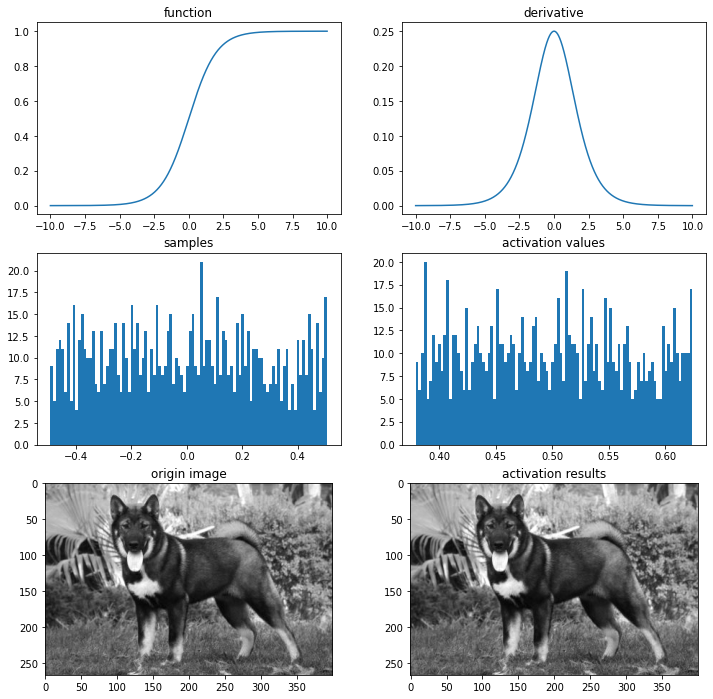

In [20]:
import os
img_path = os.getenv('HOME')+'/aiffel/activation/jindo_dog.jpg'

# 시그모이드 함수
def sigmoid(x):
    return 1/(1+np.exp(-x).astype(np.float64))

def dev_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

# 시각화
ax = plot_and_visulize(img_path, sigmoid, dev_sigmoid)
ax.show()

#### 수치 미분과 해석 미분의 차이

프로그램을 이용해서는 해석 미분을 구할 수 없기 때문에 꽤 많은 분들이 모르는 함수의 미분을 구할 때 수치 미분(numerical differentiation) 을 구합니다.

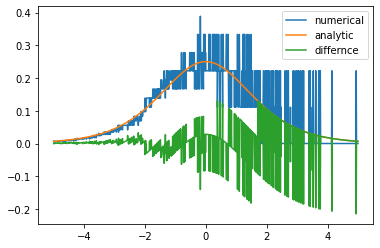

In [21]:
# 수치 미분
def num_derivative(x, function):
    h = 1e-15 # 이 값을 바꾸어 가며 그래프를 확인해 보세요
    numerator = function(x+h)-function(x)
    return numerator/h

# 두 그래프의 차이
diff_X = [-5+x/100 for x in range(1001)]
dev_y = np.array([dev_sigmoid(x) for x in diff_X])
num_dev_y = np.array([num_derivative(x, sigmoid) for x in diff_X])

diff_y = dev_y - num_dev_y
plt.plot(diff_X, num_dev_y, label='numerical')
plt.plot(diff_X, dev_y, label='analytic')
plt.plot(diff_X, diff_y, label='differnce')
plt.legend()

plt.show()

#### 시그모이드 함수의 단점

시그모이드 함수에는 두 가지 큰 단점이 있습니다.

시그모이드 함수는 00 또는 11에서 포화(saturate) 됩니다.

이 말은 입력값이 아무리 커져도 함수의 출력은 1에 더 가까워져 갈 뿐 11 이상으로 높아 않고, 입력값이 아무리 작아져도 함수의 출력은 00에 더 가까워져 갈 뿐 00 이하로 떨어지지 않는다는 의미입니다. 

이렇게 포화가 되면 발생하는 일이 바로 그래디언트가 00과 아주 가까워지는 것입니다. 

역전파에서 이 00과 가까워진 그래디언트는 앞에서 온 역전파 값에 곱해지게 되는데 그렇게 되면 그 이후로 전파되는 모든 역전파 값이 00에 근접하게 되어 사실상 가중치 업데이트가 일어나지 않게 됩니다. 

이것을 '그래디언트를 죽인다(kill the gradient)' 라고 표현합니다. 

극단적인 예로 만약 어떤 모델의 초기 가중치 값들을 아주 크게 잡아 포화상태를 만들면 역전파 때 그래디언트가 죽기 때문에 아무리 많이 에포크를 돌려도 훈련이 거의 되지 않습니다.

시그모이드 함수의 출력은 0이 중심(zero-centered)이 아닙니다. 

여기서 발생하는 문제는 훈련의 시간이 오래걸리게 된다는 것입니다. 

![title](https://d3s0tskafalll9.cloudfront.net/media/original_images/F-34-zig_zag_update.png)

이러한 단점들 때문에 최근에는 자주 사용하지 않게 되었습니다.

#### 비선형 활성화 함수를 사용해 AND gate, OR gate, XOR gate 구현

비선형 활성화 함수인 시그모이드 함수를 이용해 AND gate, OR gate, XOR gate를 구현해보겠습니다.



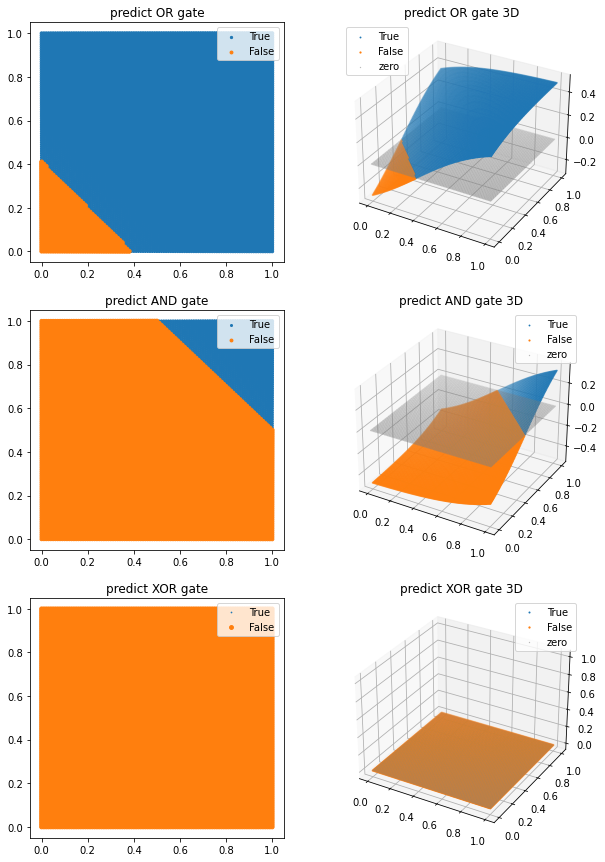

In [22]:
# OR gate
or_sigmoid_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
or_sigmoid_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
or_sigmoid_model.fit(X, or_y, epochs=1000, verbose=0)

# AND gate
and_sigmoid_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
and_sigmoid_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
and_sigmoid_model.fit(X, and_y, epochs=1000, verbose=0)

# XOR gate
xor_sigmoid_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
xor_sigmoid_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
xor_sigmoid_model.fit(X, xor_y, epochs=1000, verbose=0)

# 그래프로 그려보기
test_X = np.array([[x/100,y/100] for (x,y) in product(range(101),range(101))])
pred_or_y = or_sigmoid_model(test_X)
pred_and_y = and_sigmoid_model(test_X)
pred_xor_y = xor_sigmoid_model(test_X)

plt.figure(figsize=(10,15))
ax1 = plt.subplot(3,2,1)
ax1.set_title('predict OR gate')
ax1 = scatter_plot(ax1, test_X, pred_or_y, threshold=0.5)

ax2 = plt.subplot(3,2,2, projection='3d')
ax2.set_title('predict OR gate 3D')
ax2 = scatter_plot(ax2, test_X, pred_or_y, threshold=0.5, three_d=True)

ax3 = plt.subplot(3,2,3)
ax3.set_title('predict AND gate')
ax3 = scatter_plot(ax3, test_X, pred_and_y, threshold=0.5)

ax4 = plt.subplot(3,2,4, projection='3d')
ax4.set_title('predict AND gate 3D')
ax4 = scatter_plot(ax4, test_X, pred_and_y, threshold=0.5, three_d=True)

ax5 = plt.subplot(3,2,5)
ax5.set_title('predict XOR gate')
ax5 = scatter_plot(ax5, test_X, pred_xor_y, threshold=0.5)

ax6 = plt.subplot(3,2,6, projection='3d')
ax6.set_title('predict XOR gate 3D')
ax6 = scatter_plot(ax6, test_X, pred_xor_y, threshold=0.5, three_d=True)

plt.show()

XOR gate는 제대로 구현하지 못한 것을 확인 할 수 있습니다. 

하지만 이것이 비선형 함수들도 XOR gate를 구현하지 못한다는 것은 아닙니다. 다만, 좀 더 특수한 비선형 함수가 필요합니다.

- 참고자료 : [Solving XOR with a single Perceptron](https://medium.com/@lucaspereira0612/solving-xor-with-a-single-perceptron-34539f395182)

참고자료에 나와 있듯이 2차 다항식(quadratic polynomial)을 추가한 시그모이드 함수를 사용한다면 XOR gate를 구현할 수 있습니다.

이 밖에도 layer를 추가해준다면 XOR gate를 무리 없이 구현하는 것을 확인할 수 있습니다.

(하지만 선형 함수를 사용했을 때는 어떻게 해도 안 되죠.)


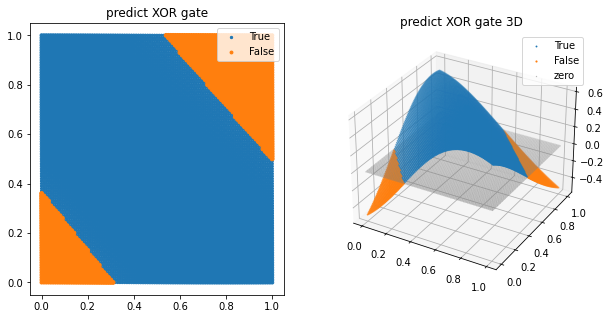

In [23]:
# 레이어를 추가했을 때
# XOR gate
xor_sigmoid_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(2, activation='sigmoid'), # 2 nodes로 변경
    tf.keras.layers.Dense(1)
])
xor_sigmoid_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
xor_sigmoid_model.fit(X, xor_y, epochs=1000, verbose=0)

plt.figure(figsize=(10,5))
pred_xor_y = xor_sigmoid_model(test_X)

ax1 = plt.subplot(1,2,1)
ax1.set_title('predict XOR gate')
ax1 = scatter_plot(ax1, test_X, pred_xor_y, threshold=0.5)

ax2 = plt.subplot(1,2,2, projection='3d')
ax2.set_title('predict XOR gate 3D')
ax2 = scatter_plot(ax2, test_X, pred_xor_y, threshold=0.5, three_d=True)

plt.show()

## Softmax

Softmax는 여러분들이 강아지와 고양이 사진을 구분하는 분류 문제에서 가장 많이 접한 함수이죠? 시그모이드는 Binary Classification, 즉 참(11) or 거짓(00) 등 2가지 class를 분류할 때 많이 쓰입니다. 왜냐하면 시그모이드는 00 과 11 사이의 출력값을 가지고 있기 때문이죠.

한편, Softmax는 10가지, 100가지 class 등 class의 수에 제한 없이 "각 class의 확률"을 구할 때 쓰입니다. 예컨대, 가위, 바위, 보 사진 분류 문제는 3개 class 분류 문제이고, softmax는 각 class의 확률값, 즉 (0.2, 0.5, 0.3)(0.2,0.5,0.3) 이렇게 출력값을 줍니다. Softmax의 가장 큰 특징은, 확률의 성질인 모든 경우의 수(=모든 class)의 확률을 더하면 11이 되는 성질을 가지고 있습니다. 그래서 Softmax는 모델의 마지막 layer에서 활용이 됩니다.

이번 시간에는 hidden layer 사이에 들어가는 활성화 함수들을 다루므로 Softmax는 이 정도로 마무리하겠습니다. 🙂

## 하이퍼볼릭 탄젠트

하이퍼볼릭 탄젠트(tanh, Hyperbolic tangent) 함수는 쌍곡선 함수 중 하나입니다.

- [참고자료 위키피디아 - 쌍곡선함수](https://ko.wikipedia.org/wiki/%EC%8C%8D%EA%B3%A1%EC%84%A0_%ED%95%A8%EC%88%98)



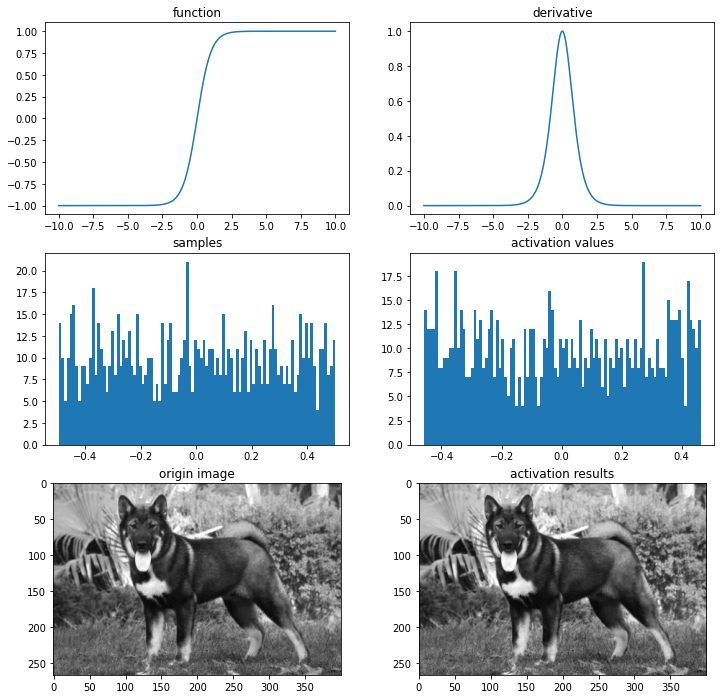

In [24]:
import os
img_path = os.getenv('HOME')+'/aiffel/activation/jindo_dog.jpg'

# 하이퍼볼릭 탄젠트 함수
def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

def dev_tanh(x):
    return 1-tanh(x)**2

# 시각화
ax = plot_and_visulize(img_path, tanh, dev_tanh)
ax.show()

- 하이퍼볼릭 탄젠트 함수의 단점

하이퍼볼릭 탄젠트 함수는 그래프에서도 알 수 있듯 -1 또는 1에서 포화됩니다.

## ReLU

ReLU(rectified linear unit) 함수는 최근 가장 많이 사용되고 있는 활성화 함수입니다.



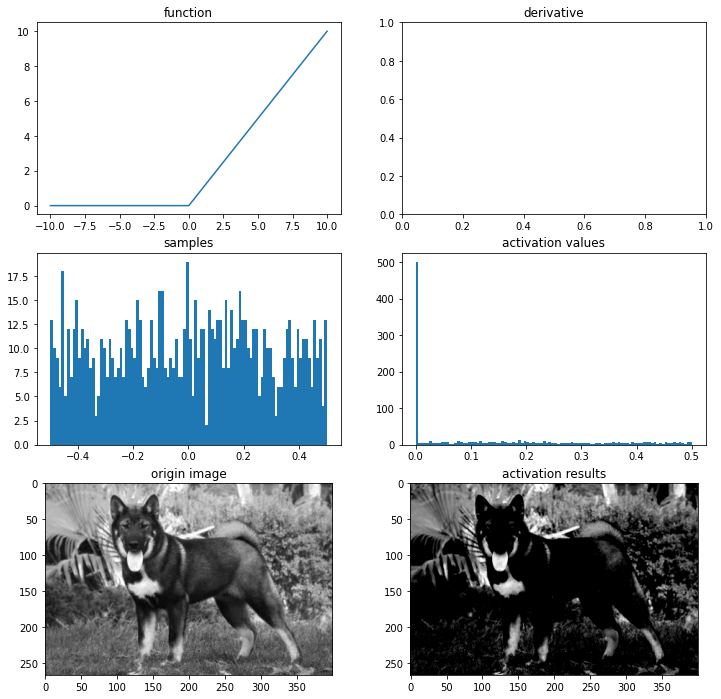

In [25]:
import os
img_path = os.getenv('HOME')+'/aiffel/activation/jindo_dog.jpg'

# relu 함수
def relu(x):
    return max(0,x)

# 시각화
ax = plot_and_visulize(img_path, relu)
ax.show()

ReLU함수의 치역은[0,∞)입니다. ReLU를 사용한 모델은 하이퍼볼릭 탄젠트를 사용한 모델보다 몇 배 더 빠르게 훈련이 됩니다. 이는 아래의 그래프를 통해서 확인할 수 있습니다.

![title](https://d3s0tskafalll9.cloudfront.net/media/original_images/0f-34.relu_tanh.png)
            
위 그래프는 에포크당 훈련 에러 비율을 나타내고 있습니다.

실선이 ReLU 함수를 사용한 모델의 에러 비율이고, 점선이 하이퍼볼릭 탄젠트 함수를 사용한 모델의 에러 비율입니다.

ReLU를 사용한 모델이 약 7배 정도 빠르게 에러 비율이 감소한 것을 볼 수 있습니다.

또한 ReLU 함수는 시그모이드나 하이퍼볼릭 탄젠트처럼 비용이 높은 (예를 들면, exponential와 같은) 연산을 사용하지 않기 때문에 처리 속도가 빠릅니다.

ReLU는 0을 제외한 구간에서 미분이 가능합니다. 


#### ReLU 함수를 이용한 모델은 비선형적 데이터의 특징을 잘 잡아낼까?

ReLU 함수를 보고 있으면 이러한 의문이 듭니다.

'시그모이드 함수처럼 곡선이 포함되어있지 않은데 어떻게 비선형적 데이터의 특징을 잡아낼까?'

과연 ReLU 함수로 f(x) = x^2
 와 같은 함수를 표현할 수 있을까요? 정답은 '표현 할 수 있다' 입니다. 이것을 수학적으로 증명한 논문이 있습니다. 하지만 이해하기 위해서 필요한 수학지식이 너무 많기 때문에 여기서는 실험을 통해 확인만 해보겠습니다.

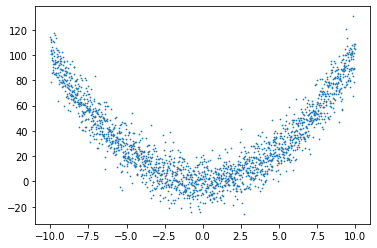

In [27]:
q_X = np.array([-10+x/100 for x in range(2001)])
q_y = np.array([(x)**2 + np.random.randn(1)*10 for x in q_X])
plt.scatter(q_X, q_y, s=0.5)

In [28]:
approx_relu_model_p = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(6, activation='relu'), # 6 nodes 병렬 연결
    tf.keras.layers.Dense(1)
])
approx_relu_model_p.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.005), metrics=['accuracy'])
approx_relu_model_p.fit(q_X, q_y, batch_size=32, epochs=100, verbose=0)

approx_relu_model_s = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(2, activation='relu'),# 2 nodes 직렬로 3번 연결
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1)
])
approx_relu_model_s.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.005), metrics=['accuracy'])
approx_relu_model_s.fit(q_X, q_y, batch_size=32, epochs=100, verbose=0)

approx_relu_model_p.summary()
approx_relu_model_s.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 6)                 12        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 7         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 2)                 4         
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 6         
____________________________________

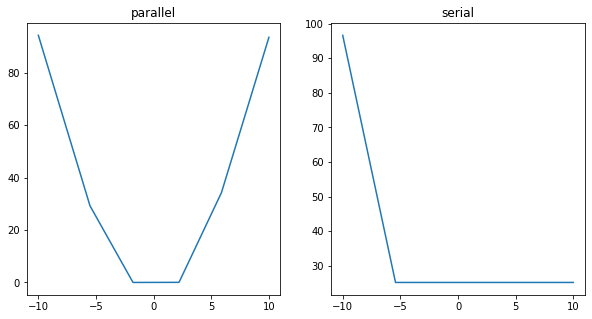

In [29]:
q_test_X = q_X.reshape((*q_X.shape,1))
plt.figure(figsize=(10,5))

ax1 = plt.subplot(1,2,1)
ax1.set_title('parallel')
pred_y_p = approx_relu_model_p(q_test_X)
ax1.plot(q_X, pred_y_p)

ax2 = plt.subplot(1,2,2)
ax2.set_title('serial')
pred_y_s = approx_relu_model_s(q_test_X)
ax2.plot(q_X, pred_y_s)

plt.show()

실제로 x^2의 그래프를 근사할 수 있는지 확인해봄과 동시에 노드를 병렬로 쌓는 것과 직렬로 쌓는 것 중에 어느 것이 더 좋은지도 비교해 보았습니다.

이 결과로 우리는 ReLU함수를 사용해도 충분히 x^2와 같은 비선형적 데이터를 예측해낼 수 있다는 것을 알 수 있었고, 파라미터 수가 같음에도 불구하고 노드를 병렬로 쌓은 것이 직렬로 쌓은 것보다 더 좋은 결과를 낸 것을 확인할 수 있었습니다.

(병렬 쌓기와 직렬 쌓기가 각각이 어떤 의미를 담고 있는지 좀 더 연구해보면 좋을 듯합니다.)

### ReLU 함수의 단점


ReLU 함수의 출력값이 00이 중심이 아닙니다. 따라서 위에서 언급햇던 문제가 발생할 수 있습니다.

또 하나의 단점은 Dying ReLU입니다. 이것의 의미는 모델에서 ReLU를 사용한 노드가 비활성화되며 출력을 00으로만 하게 되는 것입니다.

왜 이런 상황이 발생하는지 알아보겠습니다. 

만약, 이전 훈련 스텝에서 이 노드의 가중치가 업데이트되어 b가 가중치 ww값에 의해 입력값 xx에 상관없이 00이하로 나오게 되었다면, 이 이후의 업데이트에서는 그래디언트가 항상 00이 되어 가중치 업데이트가 일어나지 않게 됩니다. 즉, 이 노드의 출력값과 그래디언트가 0이 되어 노드가 죽어버립니다. 이러한 문제는 특히 학습률(learning rate)을 크게 잡을 때 자주 발생합니다. 

반대로 학습률을 줄여준다면 이 문제는 적게 발생합니다.

### Leaky ReLU

Leaky ReLU함수는 ReLU 함수의 'Dying ReLU'를 해결하기 위한 시도 중 하나입니다. 



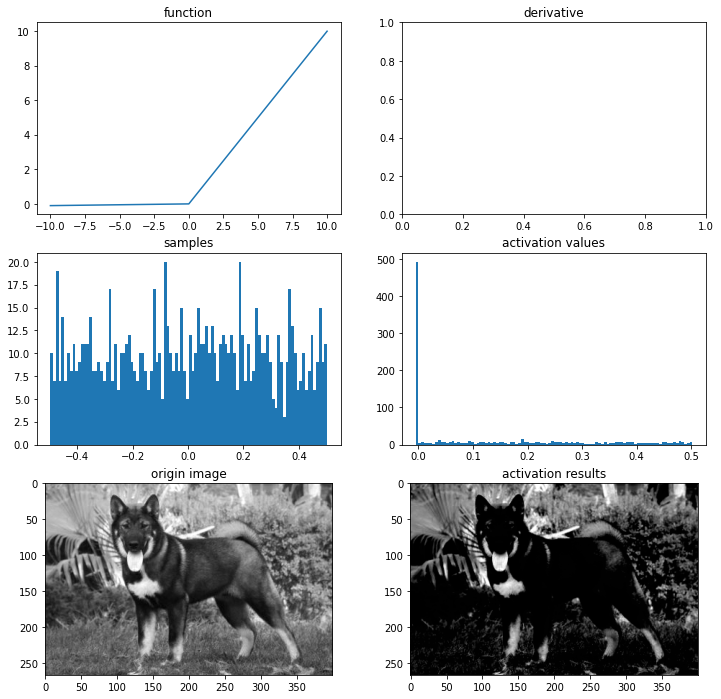

In [30]:
import os
img_path = os.getenv('HOME')+'/aiffel/activation/jindo_dog.jpg'

# leaky relu 함수
def leaky_relu(x):
    return max(0.01*x,x)

# 시각화
ax = plot_and_visulize(img_path, leaky_relu)
ax.show()

'Dying ReLU'를 발생시켰던 0을 출력하던 부분을 아주 작은 음수값을 출력하게 만들어 주어 해당 문제를 해결하였습니다.

이 부분을 제외하고는 ReLU와 같은 특성을 가집니다.

### PReLU

PReLU(parametric ReLU) 는 Leaky ReLU와 유사하지만 새로운 파라미터를 추가하여 0 미만일 때의 '기울기'가 훈련되게 했습니다.



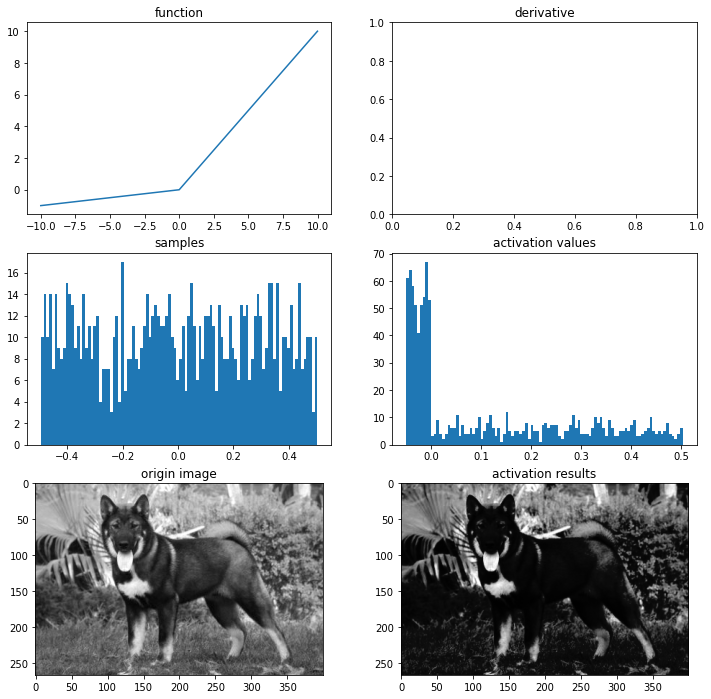

In [31]:
# PReLU 함수
def prelu(x, alpha):
    return max(alpha*x,x)

# 시각화
ax = plot_and_visulize(img_path, lambda x: prelu(x, 0.1)) # parameter alpha=0.1일 때

ax.show()

### ELU

ELU(exponential linear unit)은 ReLU의 모든 장점을 포함하며, 0이 중심점이 아니었던 단점과, 'Dying ReLU'문제를 해결한 활성화 함수입니다. 



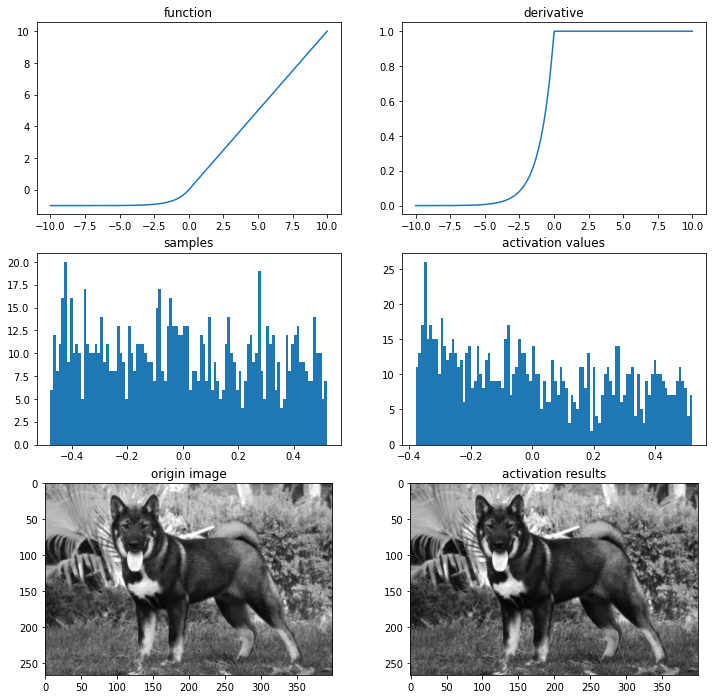

In [32]:
# elu 함수
def elu(x, alpha):
    return x if x > 0 else alpha*(np.exp(x)-1)

def dev_elu(x, alpha):
    return 1 if x > 0 else elu(x, alpha) + alpha

# 시각화
ax = plot_and_visulize(img_path, lambda x: elu(x, 1), lambda x: dev_elu(x, 1)) # alpha가 1일 때
ax.show()

이 함수의 단점은 exponential 연산이 들어가서 계산 비용이 높아졌다는 점이 있습니다.

- 이 밖의 여러 활성화 함수들 : [위키피디아 - Activation function](https://en.wikipedia.org/wiki/Activation_function)



끝으로 영상보며 굳은 몸을 풀어보아요 ~ 

[영상](https://youtu.be/1Du1XScHCww)